In [19]:
import json
import pandas as pd

# Path to the results file
results_path = "/cs/labs/guykatz/idopinto12/projects/loop_invariant_generation/RLInv/experiments/oss_20b_low_hard/gpt-oss-20b/gpt-oss-20b_results.json"

# Load the JSON results
with open(results_path, "r") as f:
    gpt_oss_20b_results = json.load(f)

# Flatten results into a DataFrame
df = pd.json_normalize(gpt_oss_20b_results["results"])

In [20]:
df.head()

,task_index,task_name,task_path,property_path,uautomizer_path,arch,baseline_time,report.final_decision,report.decision_rule,report.target_assert.content,...,report.invariant_correctness_report.reports_dir,report.invariant_correctness_report.decision_reason,report.invariant_usefulness_report.decision,report.invariant_usefulness_report.time_taken,report.invariant_usefulness_report.reports_dir,report.invariant_usefulness_report.decision_reason,report.total_time_taken,report.verification_time_taken,report.model_generation_time,report.report_file_path
0,0,freire2_unwindbound1_4,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,32bit,114.460649,UNKNOWN,DEC-PROP,(int)(4 * s) - 12 * r * r == 1,...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,,TIMEOUT,114.460649,/cs/labs/guykatz/idopinto12/projects/loop_inva...,default,119.809544,114.460649,5.348895,/cs/labs/guykatz/idopinto12/projects/loop_inva...
1,1,geo3-ll_unwindbound1_2,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,32bit,43.729456,TRUE,DEC-PROP,z * x - x + a - az * y == 0,...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,,TRUE,9.535251,/cs/labs/guykatz/idopinto12/projects/loop_inva...,,43.196798,42.082924,1.113874,/cs/labs/guykatz/idopinto12/projects/loop_inva...
2,2,bresenham-ll_unwindbound10_2,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,32bit,478.011898,UNKNOWN,DEC-U,2 * yx - 2 * xy - X + (long long)2 * Y - v + 2...,...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,,TRUE,53.838237,/cs/labs/guykatz/idopinto12/projects/loop_inva...,,55.087087,53.838237,1.248850,/cs/labs/guykatz/idopinto12/projects/loop_inva...
3,3,cohencu-ll_valuebound5_9,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,32bit,47.204000,TRUE,DEC-PROP,2 * y * y - 3 * x * z - 18 * x - 10 * y + 3 * ...,...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,,TRUE,5.814938,/cs/labs/guykatz/idopinto12/projects/loop_inva...,,30.167595,28.517899,1.649697,/cs/labs/guykatz/idopinto12/projects/loop_inva...
4,4,fermat1-ll_unwindbound10_4,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,32bit,153.856209,UNKNOWN,DEC-U,((long long)4 * A) == u * u - v * v - 2 * u + ...,...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,,TRUE,4.895206,/cs/labs/guykatz/idopinto12/projects/loop_inva...,,94.800740,94.268569,0.532171,/cs/labs/guykatz/idopinto12/projects/loop_inva...


In [26]:
# Remove all columns that have 'path' in their column names (case-insensitive)
df_results = df.drop(columns=[col for col in df.columns if 'path' in col.lower() or "dir" in col.lower()])
df_results = df_results.drop(columns=["arch"])
df_results.head()


,task_index,task_name,baseline_time,report.final_decision,report.decision_rule,report.target_assert.content,report.target_assert.line_number,report.candidate_invariant.content,report.candidate_invariant.line_number,report.syntactic_validation_result,report.invariant_correctness_report.decision,report.invariant_correctness_report.time_taken,report.invariant_correctness_report.decision_reason,report.invariant_usefulness_report.decision,report.invariant_usefulness_report.time_taken,report.invariant_usefulness_report.decision_reason,report.total_time_taken,report.verification_time_taken,report.model_generation_time
0,0,freire2_unwindbound1_4,114.460649,UNKNOWN,DEC-PROP,(int)(4 * s) - 12 * r * r == 1,15,(int)(4 * s) - 12 * r * r == 1,8,True,TRUE,20.334210,,TIMEOUT,114.460649,default,119.809544,114.460649,5.348895
1,1,geo3-ll_unwindbound1_2,43.729456,TRUE,DEC-PROP,z * x - x + a - az * y == 0,19,z * x - x + a - az * y == 0,19,True,TRUE,42.082924,,TRUE,9.535251,,43.196798,42.082924,1.113874
2,2,bresenham-ll_unwindbound10_2,478.011898,UNKNOWN,DEC-U,2 * yx - 2 * xy - X + (long long)2 * Y - v + 2...,24,2 * yx - 2 * xy - X + (long long)2 * Y - v + 2...,9,True,FALSE,4.402065,,TRUE,53.838237,,55.087087,53.838237,1.248850
3,3,cohencu-ll_valuebound5_9,47.204000,TRUE,DEC-PROP,2 * y * y - 3 * x * z - 18 * x - 10 * y + 3 * ...,16,2 * y * y - 3 * x * z - 18 * x - 10 * y + 3 * ...,8,True,TRUE,28.517899,,TRUE,5.814938,,30.167595,28.517899,1.649697
4,4,fermat1-ll_unwindbound10_4,153.856209,UNKNOWN,DEC-U,((long long)4 * A) == u * u - v * v - 2 * u + ...,27,((long long)4 * A) == u * u - v * v - 2 * u + ...,27,True,FALSE,94.268569,,TRUE,4.895206,,94.800740,94.268569,0.532171


In [27]:
print(f"Total number of samples: {df_results.shape[0]}")

Total number of samples: 72


In [28]:
# Compute speedup_with_gen: baseline_time / report.total_time_taken
df_results["speedup_with_gen"] = df_results["baseline_time"] / pd.to_numeric(df_results["report.total_time_taken"], errors="coerce")

# Compute speedup_without_gen: baseline_time / report.verification_time_taken
df_results["speedup_without_gen"] = df_results["baseline_time"] / pd.to_numeric(df_results["report.verification_time_taken"], errors="coerce")
df_results.head()

,task_index,task_name,baseline_time,report.final_decision,report.decision_rule,report.target_assert.content,report.target_assert.line_number,report.candidate_invariant.content,report.candidate_invariant.line_number,report.syntactic_validation_result,...,report.invariant_correctness_report.time_taken,report.invariant_correctness_report.decision_reason,report.invariant_usefulness_report.decision,report.invariant_usefulness_report.time_taken,report.invariant_usefulness_report.decision_reason,report.total_time_taken,report.verification_time_taken,report.model_generation_time,speedup_with_gen,speedup_without_gen
0,0,freire2_unwindbound1_4,114.460649,UNKNOWN,DEC-PROP,(int)(4 * s) - 12 * r * r == 1,15,(int)(4 * s) - 12 * r * r == 1,8,True,...,20.334210,,TIMEOUT,114.460649,default,119.809544,114.460649,5.348895,0.955355,1.000000
1,1,geo3-ll_unwindbound1_2,43.729456,TRUE,DEC-PROP,z * x - x + a - az * y == 0,19,z * x - x + a - az * y == 0,19,True,...,42.082924,,TRUE,9.535251,,43.196798,42.082924,1.113874,1.012331,1.039126
2,2,bresenham-ll_unwindbound10_2,478.011898,UNKNOWN,DEC-U,2 * yx - 2 * xy - X + (long long)2 * Y - v + 2...,24,2 * yx - 2 * xy - X + (long long)2 * Y - v + 2...,9,True,...,4.402065,,TRUE,53.838237,,55.087087,53.838237,1.248850,8.677386,8.878669
3,3,cohencu-ll_valuebound5_9,47.204000,TRUE,DEC-PROP,2 * y * y - 3 * x * z - 18 * x - 10 * y + 3 * ...,16,2 * y * y - 3 * x * z - 18 * x - 10 * y + 3 * ...,8,True,...,28.517899,,TRUE,5.814938,,30.167595,28.517899,1.649697,1.564725,1.655241
4,4,fermat1-ll_unwindbound10_4,153.856209,UNKNOWN,DEC-U,((long long)4 * A) == u * u - v * v - 2 * u + ...,27,((long long)4 * A) == u * u - v * v - 2 * u + ...,27,True,...,94.268569,,TRUE,4.895206,,94.800740,94.268569,0.532171,1.622943,1.632105


In [53]:
n_samples = df_results.shape[0]
valid_speedup_without_gen = ((df_results["speedup_without_gen"] > 1 )& (df_results["report.final_decision"] != "UNKNOWN"))
valid_speedup_with_gen = ((df_results["speedup_with_gen"] > 1) & (df_results["report.final_decision"] != "UNKNOWN"))
num_speedup_without_gen = valid_speedup_without_gen.sum()
num_speedup_with_gen = valid_speedup_with_gen.sum()
percent_speedup_without_gen = num_speedup_without_gen / n_samples * 100
percent_speedup_with_gen = num_speedup_with_gen / n_samples * 100

print(f"Percentage of samples with speedup (without gen) [{num_speedup_without_gen}/{n_samples}]: {percent_speedup_without_gen:.2f}%")
print(f"Percentage of samples with speedup (with gen) [{num_speedup_with_gen}/{n_samples}]: {percent_speedup_with_gen:.2f}%")

Percentage of samples with speedup (without gen) [27/72]: 37.50%
Percentage of samples with speedup (with gen) [26/72]: 36.11%


In [ ]:
avg_speedup_without_gen_gt1 = df_results[valid_speedup_without_gen]["speedup_without_gen"].mean()
avg_speedup_with_gen_gt1 = df_results[valid_speedup_with_gen]["speedup_with_gen"].mean()
print(f"Average speedup (without gen) [speedup > 1]: {avg_speedup_without_gen_gt1:.4f}X§")
print(f"Average speedup (with gen) [speedup > 1]: {avg_speedup_with_gen_gt1:.4f}X")


Average speedup (without gen) [speedup > 1]: 5.7762
Average speedup (with gen) [speedup > 1]: 5.1525


In [61]:
# Compute average speedup treating all non-speedup cases (speedup <= 1 or UNKNOWN) as 1
# Only consider conclusive cases for setting speedup > 1, else set to 1; exclude UNKNOWN
speedup_with_gen_all = df_results.apply(
    lambda row: row["speedup_with_gen"] if (
        pd.notnull(row["speedup_with_gen"])
        and row["report.final_decision"] != "UNKNOWN"
        and row["speedup_with_gen"] > 1
    ) else 1,
    axis=1
)
speedup_without_gen_all = df_results.apply(
    lambda row: row["speedup_without_gen"] if (
        pd.notnull(row["speedup_without_gen"])
        and row["report.final_decision"] != "UNKNOWN"
        and row["speedup_without_gen"] > 1
    ) else 1,
    axis=1
)
avg_speedup_with_gen_all = speedup_with_gen_all.mean()
avg_speedup_without_gen_all = speedup_without_gen_all.mean()
print(f"Average speedup_with_gen (non-speedup as 1): {avg_speedup_with_gen_all:.4f}X")
print(f"Average speedup_without_gen (non-speedup as 1): {avg_speedup_without_gen_all:.4f}X")


Average speedup_with_gen (non-speedup as 1): 2.4995X
Average speedup_without_gen (non-speedup as 1): 2.7911X


Average speedup_with_gen (speedup > 1): 5.1525
Average speedup_without_gen (speedup > 1): 5.7762


In [68]:
num_correct_invariants = (df_results["report.invariant_correctness_report.decision"] == "TRUE").sum()
percent_correct_invariants = num_correct_invariants / n_samples * 100
num_correct_with_unknown_inv = ((df_results["report.final_decision"] == "UNKNOWN") & (df_results["report.invariant_correctness_report.decision"] == "TRUE")).sum()
percent_correct_with_unknown_inv = num_correct_with_unknown_inv / n_samples * 100
num_correct_conclusive_inv = ((df_results["report.final_decision"] != "UNKNOWN") & (df_results["report.invariant_correctness_report.decision"] == "TRUE")).sum()
percent_correct_conclusive_inv = num_correct_conclusive_inv / n_samples * 100
print(f"% Correct Invariant [{num_correct_invariants}/{n_samples}]: {percent_correct_invariants:.2f}%")
print(f"% Correct Invariant (with unknown final decision) [{num_correct_with_unknown_inv}/{n_samples}]: {percent_correct_with_unknown_inv:.2f}%")
print(f"% Correct Invariant (with conclusive final decision) [{num_correct_conclusive_inv}/{n_samples}]: {percent_correct_conclusive_inv:.2f}%")

% Correct Invariant [31/72]: 43.06%
% Correct Invariant (with unknown final decision) [5/72]: 6.94%
% Correct Invariant (with conclusive final decision) [26/72]: 36.11%


,task_index,task_name,task_path,property_path,uautomizer_path,arch,baseline_time,report.final_decision,report.decision_rule,report.target_assert.content,...,report.invariant_usefulness_report.decision,report.invariant_usefulness_report.time_taken,report.invariant_usefulness_report.reports_dir,report.invariant_usefulness_report.decision_reason,report.total_time_taken,report.verification_time_taken,report.model_generation_time,report.report_file_path,speedup_with_gen,speedup_without_gen
1,1,geo3-ll_unwindbound1_2,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,32bit,43.729456,TRUE,DEC-PROP,z * x - x + a - az * y == 0,...,TRUE,9.535251,/cs/labs/guykatz/idopinto12/projects/loop_inva...,,43.196798,42.082924,1.113874,/cs/labs/guykatz/idopinto12/projects/loop_inva...,1.012331,1.039126
3,3,cohencu-ll_valuebound5_9,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,32bit,47.204000,TRUE,DEC-PROP,2 * y * y - 3 * x * z - 18 * x - 10 * y + 3 * ...,...,TRUE,5.814938,/cs/labs/guykatz/idopinto12/projects/loop_inva...,,30.167595,28.517899,1.649697,/cs/labs/guykatz/idopinto12/projects/loop_inva...,1.564725,1.655241
6,6,sll-queue-1_12,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,32bit,461.759118,TRUE,DEC-PROP,head->next->next != NULL,...,TRUE,175.192380,/cs/labs/guykatz/idopinto12/projects/loop_inva...,,176.985663,175.192380,1.793283,/cs/labs/guykatz/idopinto12/projects/loop_inva...,2.609020,2.635726
8,8,egcd2-ll_unwindbound50_6,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,32bit,51.606540,TRUE,DEC-PROP,p * x + r * y == a,...,TRUE,5.251292,/cs/labs/guykatz/idopinto12/projects/loop_inva...,,34.247274,33.313507,0.933767,/cs/labs/guykatz/idopinto12/projects/loop_inva...,1.506880,1.549118
9,9,dijkstra-u_valuebound2_2,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,32bit,156.967098,TRUE,DEC-PROP,p * p + r * q == n * q,...,TRUE,11.073682,/cs/labs/guykatz/idopinto12/projects/loop_inva...,,124.073379,123.542019,0.531361,/cs/labs/guykatz/idopinto12/projects/loop_inva...,1.265115,1.270556


In [62]:
df_results.head()

,task_index,task_name,baseline_time,report.final_decision,report.decision_rule,report.target_assert.content,report.target_assert.line_number,report.candidate_invariant.content,report.candidate_invariant.line_number,report.syntactic_validation_result,...,report.invariant_correctness_report.time_taken,report.invariant_correctness_report.decision_reason,report.invariant_usefulness_report.decision,report.invariant_usefulness_report.time_taken,report.invariant_usefulness_report.decision_reason,report.total_time_taken,report.verification_time_taken,report.model_generation_time,speedup_with_gen,speedup_without_gen
0,0,freire2_unwindbound1_4,114.460649,UNKNOWN,DEC-PROP,(int)(4 * s) - 12 * r * r == 1,15,(int)(4 * s) - 12 * r * r == 1,8,True,...,20.334210,,TIMEOUT,114.460649,default,119.809544,114.460649,5.348895,0.955355,1.000000
1,1,geo3-ll_unwindbound1_2,43.729456,TRUE,DEC-PROP,z * x - x + a - az * y == 0,19,z * x - x + a - az * y == 0,19,True,...,42.082924,,TRUE,9.535251,,43.196798,42.082924,1.113874,1.012331,1.039126
2,2,bresenham-ll_unwindbound10_2,478.011898,UNKNOWN,DEC-U,2 * yx - 2 * xy - X + (long long)2 * Y - v + 2...,24,2 * yx - 2 * xy - X + (long long)2 * Y - v + 2...,9,True,...,4.402065,,TRUE,53.838237,,55.087087,53.838237,1.248850,8.677386,8.878669
3,3,cohencu-ll_valuebound5_9,47.204000,TRUE,DEC-PROP,2 * y * y - 3 * x * z - 18 * x - 10 * y + 3 * ...,16,2 * y * y - 3 * x * z - 18 * x - 10 * y + 3 * ...,8,True,...,28.517899,,TRUE,5.814938,,30.167595,28.517899,1.649697,1.564725,1.655241
4,4,fermat1-ll_unwindbound10_4,153.856209,UNKNOWN,DEC-U,((long long)4 * A) == u * u - v * v - 2 * u + ...,27,((long long)4 * A) == u * u - v * v - 2 * u + ...,27,True,...,94.268569,,TRUE,4.895206,,94.800740,94.268569,0.532171,1.622943,1.632105


In [ ]:
num_equal = (df_results["report.target_assert.content"] == df_results["report.candidate_invariant.content"]).sum()
print(f"Number of times report.target_assert.content == report.candidate_invariant.content: {num_equal}/ {n_samples} = {num_equal/n_samples*100:.2f}%")


Number of times report.target_assert.content == report.candidate_invariant.content: 32/ 72 = 44.44%


In [67]:
correct_invariants = df_results[df_results["report.invariant_correctness_report.decision"] == "TRUE"]
num_equal = (correct_invariants["report.target_assert.content"] == correct_invariants["report.candidate_invariant.content"]).sum()
n_correct = correct_invariants.shape[0]
print(f"Number of times report.target_assert.content == report.candidate_invariant.content (only correct invariants): {num_equal}/ {n_correct} = {num_equal/n_correct*100:.2f}%")


Number of times report.target_assert.content == report.candidate_invariant.content (only correct invariants): 16/ 31 = 51.61%


In [69]:
# For all results
mask_equal_content_line = (
    (df_results["report.target_assert.content"] == df_results["report.candidate_invariant.content"]) &
    (df_results["report.target_assert.line_number"] == df_results["report.candidate_invariant.line_number"])
)
num_equal_all = mask_equal_content_line.sum()
print(f"Number of times target_assert.content == candidate_invariant.content AND line_number: {num_equal_all}/ {n_samples} = {num_equal_all/n_samples*100:.2f}% (all)")

# For correct invariants only
correct_invariants = df_results[df_results["report.invariant_correctness_report.decision"] == "TRUE"]
mask_equal_correct = (
    (correct_invariants["report.target_assert.content"] == correct_invariants["report.candidate_invariant.content"]) &
    (correct_invariants["report.target_assert.line_number"] == correct_invariants["report.candidate_invariant.line_number"])
)
num_equal_correct = mask_equal_correct.sum()
n_correct = correct_invariants.shape[0]
print(f"Number of times target_assert.content == candidate_invariant.content AND line_number: {num_equal_correct}/ {n_correct} = {num_equal_correct/n_correct*100:.2f}% (correct invariants)")


Number of times target_assert.content == candidate_invariant.content AND line_number: 21/ 72 = 29.17% (all)
Number of times target_assert.content == candidate_invariant.content AND line_number: 12/ 31 = 38.71% (correct invariants)


report.decision_rule
DEC-PROP     26
DEC-FALSE     1
Name: count, dtype: int64

report.invariant_correctness_report.decision
TRUE     26
FALSE     1
Name: count, dtype: int64

report.invariant_usefulness_report.decision
TRUE     26
FALSE     1
Name: count, dtype: int64

,task_index,task_name,task_path,property_path,uautomizer_path,arch,baseline_time,report.final_decision,report.decision_rule,report.target_assert.content,...,report.invariant_usefulness_report.decision,report.invariant_usefulness_report.time_taken,report.invariant_usefulness_report.reports_dir,report.invariant_usefulness_report.decision_reason,report.total_time_taken,report.verification_time_taken,report.model_generation_time,report.report_file_path,speedup_with_gen,speedup_without_gen
37,37,egcd3-ll_unwindbound10_5,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,32bit,66.674998,FALSE,DEC-FALSE,p * x - q * x + r * y - s * y == a,...,FALSE,12.70847,/cs/labs/guykatz/idopinto12/projects/loop_inva...,,15.584754,12.70847,2.876284,/cs/labs/guykatz/idopinto12/projects/loop_inva...,4.278219,5.246501


,task_index,task_name,task_path,property_path,uautomizer_path,arch,baseline_time,report.final_decision,report.decision_rule,report.target_assert.content,...,report.invariant_usefulness_report.decision,report.invariant_usefulness_report.time_taken,report.invariant_usefulness_report.reports_dir,report.invariant_usefulness_report.decision_reason,report.total_time_taken,report.verification_time_taken,report.model_generation_time,report.report_file_path,speedup_with_gen,speedup_without_gen
0,0,freire2_unwindbound1_4,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,32bit,114.460649,UNKNOWN,DEC-PROP,(int)(4 * s) - 12 * r * r == 1,...,TIMEOUT,114.460649,/cs/labs/guykatz/idopinto12/projects/loop_inva...,default,119.809544,114.460649,5.348895,/cs/labs/guykatz/idopinto12/projects/loop_inva...,0.955355,1.000000
2,2,bresenham-ll_unwindbound10_2,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,32bit,478.011898,UNKNOWN,DEC-U,2 * yx - 2 * xy - X + (long long)2 * Y - v + 2...,...,TRUE,53.838237,/cs/labs/guykatz/idopinto12/projects/loop_inva...,,55.087087,53.838237,1.248850,/cs/labs/guykatz/idopinto12/projects/loop_inva...,8.677386,8.878669
4,4,fermat1-ll_unwindbound10_4,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,32bit,153.856209,UNKNOWN,DEC-U,((long long)4 * A) == u * u - v * v - 2 * u + ...,...,TRUE,4.895206,/cs/labs/guykatz/idopinto12/projects/loop_inva...,,94.800740,94.268569,0.532171,/cs/labs/guykatz/idopinto12/projects/loop_inva...,1.622943,1.632105
5,5,freire2_unwindbound1_6,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,32bit,74.040267,UNKNOWN,DEC-U,(int)(8 * r * s - 24 * a + 16 * r - 12 * s + 2...,...,TIMEOUT,74.040267,/cs/labs/guykatz/idopinto12/projects/loop_inva...,default,75.479368,74.040267,1.439102,/cs/labs/guykatz/idopinto12/projects/loop_inva...,0.980934,1.000000
7,7,cohencu-ll_unwindbound20_9,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,/cs/labs/guykatz/idopinto12/projects/loop_inva...,32bit,33.063298,UNKNOWN,DEC-U,2 * y * y - 3 * x * z - 18 * x - 10 * y + 3 * ...,...,TIMEOUT,33.063298,/cs/labs/guykatz/idopinto12/projects/loop_inva...,default,34.402893,33.063298,1.339595,/cs/labs/guykatz/idopinto12/projects/loop_inva...,0.961062,1.000000


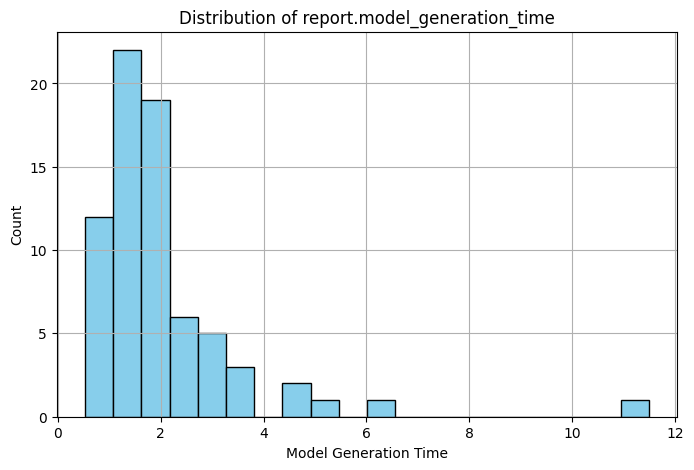

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df_results["report.model_generation_time"].hist(bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Model Generation Time")
plt.ylabel("Count")
plt.title("Distribution of report.model_generation_time")
plt.show()
# 0 - 12 seconds gpt-oss-20b-low


report.invariant_correctness_report.decision
FALSE      21
TIMEOUT    19
TRUE        5
Name: count, dtype: int64

report.invariant_usefulness_report.decision
TRUE       24
TIMEOUT    21
Name: count, dtype: int64

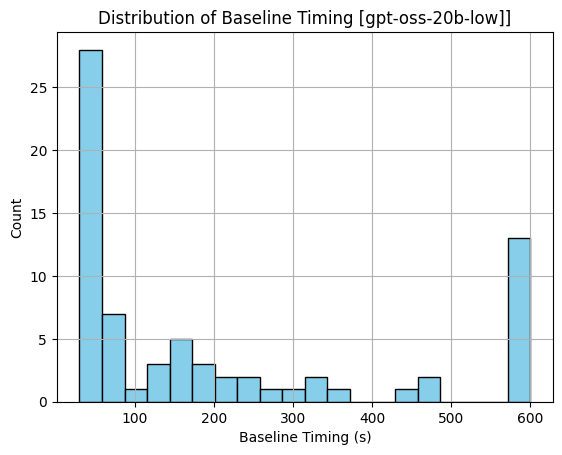

In [77]:
df_results["baseline_time"].hist(bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Baseline Timing (s)")
plt.ylabel("Count")
plt.title("Distribution of Baseline Timing [gpt-oss-20b-low]]")
plt.show()

In [79]:
count_600 = (df_results["baseline_time"] == 600).sum()
print(f"Number of instances where baseline_time == 600: {count_600}")
print("File names with baseline_time == 600:")
print(df_results.loc[df_results["baseline_time"] == 600, "task_name"].tolist())


Number of instances where baseline_time == 600: 12
File names with baseline_time == 600:
['rewnifrev2_1', 'dll-simple-white-blue-2_2', 'fermat1-ll_valuebound5_4', 'hard2_4', 'rewnifrev_1', 'egcd2_3', 'sll-queue-1_13', 'poly1_1', 'egcd2-ll_valuebound2_4', 'hard-u_5', 'freire2_valuebound10_2', 'eureka_01-1_1']


In [81]:
df_results.loc[df_results["baseline_time"] == 600]

,task_index,task_name,baseline_time,report.final_decision,report.decision_rule,report.target_assert.content,report.target_assert.line_number,report.candidate_invariant.content,report.candidate_invariant.line_number,report.syntactic_validation_result,...,report.invariant_correctness_report.time_taken,report.invariant_correctness_report.decision_reason,report.invariant_usefulness_report.decision,report.invariant_usefulness_report.time_taken,report.invariant_usefulness_report.decision_reason,report.total_time_taken,report.verification_time_taken,report.model_generation_time,speedup_with_gen,speedup_without_gen
20,20,rewnifrev2_1,600.0,UNKNOWN,DEC-U,a[i] >= i,12,a[i] == i,12,True,...,600.000000,default,TRUE,4.964949,,601.649313,600.000000,1.649313,0.997259,1.000000
22,22,dll-simple-white-blue-2_2,600.0,UNKNOWN,DEC-U,0,47,x->data != 1,45,True,...,7.259611,,TIMEOUT,600.000000,default,601.420976,600.000000,1.420976,0.997637,1.000000
27,27,fermat1-ll_valuebound5_4,600.0,TRUE,DEC-PROP,((long long)4 * A) == u * u - v * v - 2 * u + ...,26,(long long)u * u - (long long)v * v - 2 * u + ...,8,True,...,5.907336,,TRUE,5.941848,,7.042558,5.941848,1.100710,85.196317,100.978686
38,38,hard2_4,600.0,UNKNOWN,DEC-U,A == q * B + r,16,r < d && q * B + r == A && d == p * B,16,True,...,600.000000,default,TRUE,8.434029,,601.664489,600.000000,1.664489,0.997234,1.000000
39,39,rewnifrev_1,600.0,UNKNOWN,DEC-U,a[i] >= i,14,a[i] == i,8,True,...,20.867127,,TRUE,22.450975,,27.360462,22.450975,4.909487,21.929454,26.724898
42,42,egcd2_3,600.0,UNKNOWN,DEC-U,b == x * q + y * s,19,b == x * q + y * s,19,True,...,600.000000,default,TRUE,6.984127,,601.387267,600.000000,1.387267,0.997693,1.000000
51,51,sll-queue-1_13,600.0,UNKNOWN,DEC-U,head->next->next->next != NULL,29,status == 3 && head->next->next->next != NULL,29,True,...,600.000000,default,TIMEOUT,600.000000,default,601.664376,600.000000,1.664376,0.997234,1.000000
56,56,poly1_1,600.0,UNKNOWN,DEC-PROP,a[i] == i * i,11,i == 0 || a[i-1] == (i-1)*(i-1),8,True,...,8.649046,,TIMEOUT,600.000000,default,602.542534,600.000000,2.542534,0.995780,1.000000
66,66,egcd2-ll_valuebound2_4,600.0,UNKNOWN,DEC-PROP,q * xy + s * yy - q * x - b * y - s * y + b == 0,21,a >= 0 && b >= 0,15,True,...,7.748774,,TIMEOUT,600.000000,default,601.357864,600.000000,1.357864,0.997742,1.000000
67,67,hard-u_5,600.0,UNKNOWN,DEC-U,d == B * p,16,d == B * p,16,True,...,600.000000,default,TRUE,6.698870,,601.727530,600.000000,1.727530,0.997129,1.000000


In [ ]:
include_gen_time = False
metrics = {
    "% Correct Invariant": None,
    "% Speedup": None,
    "Avg Speedup > 1": None,
    "Avg Speedup All": None,
}
speedup_col = "speedup_with_gen" if include_gen_time else "speedup_without_gen"
valid_speedup_with_gen = ((df_results[speedup_col] > 1) & (df_results["report.final_decision"] != "UNKNOWN"))
correct_invariants = df_results[df_results["report.invariant_correctness_report.decision"] == "TRUE"] # TODO: Think if to include correct but not useful
speedup_gt1 = df_results[valid_speedup_with_gen]

In [129]:
speedup_gt1.head()

,task_index,task_name,baseline_time,report.final_decision,report.decision_rule,report.target_assert.content,report.target_assert.line_number,report.candidate_invariant.content,report.candidate_invariant.line_number,report.syntactic_validation_result,...,report.invariant_usefulness_report.decision,report.invariant_usefulness_report.time_taken,report.invariant_usefulness_report.decision_reason,report.total_time_taken,report.verification_time_taken,report.model_generation_time,speedup_with_gen,speedup_without_gen,speedup,decision_with_count
1,1,geo3-ll_unwindbound1_2,43.73,TRUE,DEC-PROP,z * x - x + a - az * y == 0,19,z * x - x + a - az * y == 0,19,True,...,TRUE,9.535251,,43.196798,42.08,1.113874,1.012331,1.039126,1.04,TRUE (26)
3,3,cohencu-ll_valuebound5_9,47.20,TRUE,DEC-PROP,2 * y * y - 3 * x * z - 18 * x - 10 * y + 3 * ...,16,2 * y * y - 3 * x * z - 18 * x - 10 * y + 3 * ...,8,True,...,TRUE,5.814938,,30.167595,28.52,1.649697,1.564725,1.655241,1.65,TRUE (26)
6,6,sll-queue-1_12,461.76,TRUE,DEC-PROP,head->next->next != NULL,29,status >= 3 && head->next->next != NULL,29,True,...,TRUE,175.192380,,176.985663,175.19,1.793283,2.609020,2.635726,2.64,TRUE (26)
8,8,egcd2-ll_unwindbound50_6,51.61,TRUE,DEC-PROP,p * x + r * y == a,38,p * x + r * y == a,38,True,...,TRUE,5.251292,,34.247274,33.31,0.933767,1.506880,1.549118,1.55,TRUE (26)
9,9,dijkstra-u_valuebound2_2,156.97,TRUE,DEC-PROP,p * p + r * q == n * q,13,p * p + r * q == n * q,13,True,...,TRUE,11.073682,,124.073379,123.54,0.531361,1.265115,1.270556,1.27,TRUE (26)


In [121]:
import plotly.express as px

def plot_verification_vs_baseline(
    df,
    model_name="gpt-oss-20b-low",
    baseline_name="UAutomizer25 (0.3.0-dev-d790fec)",
    split_name="hard",
    x_col="report.verification_time_taken",
    y_col="baseline_time",
    decision_col="report.final_decision",
    correctness_col="report.invariant_correctness_report.decision",
    usefulness_col="report.invariant_usefulness_report.decision",
    decision_rule_col="report.decision_rule",
    n_samples=None,
    fig_size=(800, 800),
    include_gen_time=False   
):
    """
    Plots a scatter plot comparing LLM-assisted verification time vs baseline time,
    colored by the report.final_decision, with legends including decision counts.
    Adds the correctness, usefulness, and decision rule as extra hover information.
    If include_gen_time=True, then the LLM-assisted value is report.total_time_taken.
    Also prints and annotates the number of points that are exactly at (600, 600).
    If include_gen_time=True, additionally includes model generation time in the hover info.
    """
    df = df.copy()
    # Use total time if include_gen_time is True
    if include_gen_time:
        x_col = "report.total_time_taken"
        if "report.total_time_taken" not in df.columns:
            raise ValueError("DataFrame must include 'report.total_time_taken' when include_gen_time=True")

    if n_samples is None:
        n_samples = df.shape[0]

    decision_counts = df[decision_col].value_counts().to_dict()
    def legend_dec_label(decision):
        count = decision_counts.get(decision, 0)
        return f"{decision} ({count})"
    df["decision_with_count"] = df[decision_col].apply(legend_dec_label)

    # Round relevant columns for display
    df[x_col] = df[x_col].round(2)
    df[y_col] = df[y_col].round(2)
    df["speedup"] = (df[y_col] / df[x_col]).round(2)

    # If include_gen_time, round model_gen_time and add to custom_data
    if include_gen_time:
        gen_time_col = "report.model_generation_time"
        if gen_time_col in df.columns:
            df[gen_time_col] = df[gen_time_col].round(2)
        else:
            raise ValueError("DataFrame must include 'report.model_generation_time' when include_gen_time=True")

    # Count and show number of dots at (600, 600)
    num_600_600 = ((df[x_col] == 600) & (df[y_col] == 600)).sum()
    # print(f"Number of dots at (600, 600): {num_600_600}")

    # Build custom_data for hover
    custom_data = [
        "task_name",      # 0
        "task_index",     # 1
        decision_col,     # 2
        x_col,            # 3
        y_col,            # 4
        "speedup",        # 5
        correctness_col,  # 6
        usefulness_col,   # 7
        decision_rule_col # 8
    ]

    # If include_gen_time, add the model generation time at the end
    if include_gen_time:
        custom_data.append("report.model_generation_time") # 9 if so

    color_map_base = {
        "TRUE": "green",
        "FALSE": "red",
        "UNKNOWN": "blue",
    }
    color_discrete_map = {}
    for k in decision_counts:
        label = legend_dec_label(k)
        color_discrete_map[label] = color_map_base.get(k, None)

    timing_label = (
        "LLM-assisted Verification+Gen Time (s)"
        if include_gen_time else
        "LLM-assisted Verification Time (s)"
    )

    title = (
        f"LLM-assisted Verification{' + Gen Time' if include_gen_time else ''} vs Baseline Median Time<br>"
        f"<sup>Model: {model_name} | Baseline: {baseline_name} | InvBench Split: {split_name} "
        f"[{n_samples} benchmarks]</sup>"
    )
    fig = px.scatter(
        df,
        x=x_col,
        y=y_col,
        custom_data=custom_data,
        title=title,
        labels={
            x_col: timing_label,
            y_col: "Baseline Timing (s)",
            "decision_with_count": "Final Decision (count)",
            decision_col: "Final Decision",
            "speedup": "Speedup",
            "task_index": "Task Index",
            correctness_col: "Correctness Decision",
            usefulness_col: "Usefulness Decision",
            decision_rule_col: "Decision Rule",
            "report.model_generation_time": "Model Generation Time (s)"
        },
        color="decision_with_count",
        symbol="decision_with_count",
        color_discrete_map=color_discrete_map,
    )

    # Set hovertemplate: add model generation time if needed
    if include_gen_time:
        # index 9 in custom_data is model gen time
        hovertemplate = (
            "<b>%{customdata[0]}</b><br><br>" +
            "Final Decision=%{customdata[2]}<br>" +
            f"{timing_label}=%{{customdata[3]:.2f}}<br>" +
            "Baseline Timing (s)=%{customdata[4]:.2f}<br>" +
            "Model Generation Time (s)=%{customdata[9]:.2f}<br>" +
            "Task Index=%{customdata[1]}<br>" +
            "Speedup=%{customdata[5]:.2f}<br>" +
            "Correctness Decision=%{customdata[6]}<br>" +
            "Usefulness Decision=%{customdata[7]}<br>" +
            "Decision Rule=%{customdata[8]}<br>" +
            "<extra></extra>"
        )
    else:
        hovertemplate = (
            "<b>%{customdata[0]}</b><br><br>" +
            "Final Decision=%{customdata[2]}<br>" +
            f"{timing_label}=%{{customdata[3]:.2f}}<br>" +
            "Baseline Timing (s)=%{customdata[4]:.2f}<br>" +
            "Task Index=%{customdata[1]}<br>" +
            "Speedup=%{customdata[5]:.2f}<br>" +
            "Correctness Decision=%{customdata[6]}<br>" +
            "Usefulness Decision=%{customdata[7]}<br>" +
            "Decision Rule=%{customdata[8]}<br>" +
            "<extra></extra>"
        )

    fig.update_traces(hovertemplate=hovertemplate)

    # Add timeout lines (x=600, y=600) with more neutral color (gray)
    fig.add_shape(type="line",
                  x0=600, y0=df[y_col].min(),
                  x1=600, y1=max(df[y_col].max(), 600),
                  line=dict(color='gray', dash='dash'),
                  name="Timeout (600s, x-axis)")

    fig.add_shape(type="line",
                  x0=df[x_col].min(), y0=600,
                  x1=max(df[x_col].max(), 600), y1=600,
                  line=dict(color='gray', dash='dash'),
                  name="Timeout (600s, y-axis)")

    lims = [
        min(df[x_col].min(), df[y_col].min()),
        max(df[x_col].max(), df[y_col].max(), 600)
    ]
    fig.add_shape(
        type="line",
        x0=lims[0], y0=lims[0],
        x1=lims[1], y1=lims[1],
        line=dict(color="orange", dash="solid"),
        name="y = x (equal timing)"
    )

    # Annotate the number of dots at (600, 600) on the plot.
    # Place annotation slightly offset to avoid hiding any marker
    fig.add_annotation(
        x=600,
        y=600,
        text=f"Count at (600, 600): {num_600_600}",
        showarrow=True,
        arrowhead=2,
        ax=40,
        ay=-40,
        font=dict(color="black", size=16),
        bgcolor="rgba(255,255,255,0.8)",
        bordercolor="black",
        borderwidth=1
    )

    fig.update_layout(
        width=fig_size[0],
        height=fig_size[1],
        showlegend=True,
        xaxis=dict(range=[lims[0]*0.95, lims[1]*1.05]),
        yaxis=dict(range=[lims[0]*0.95, lims[1]*1.05]),
        title_x=0.5,
    )

    fig.show()

# Example usage:
plot_verification_vs_baseline(df_results)


In [122]:
plot_verification_vs_baseline(df_results, include_gen_time=True)